In [201]:

# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest
from scipy.stats import ttest_ind


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


from itertools import combinations


# Fase 1: Exploración y Limpieza


**1- Exploración Inicial:**

- Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.

- Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.

- Uno los dos conjuntos de datos de la forma más eficiente.

In [202]:
df_flight = pd.read_csv("Customer Flight Activity.csv")
df_flight.head(5)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [203]:
df_customer = pd.read_csv("Customer Loyalty History.csv")
df_customer.head(5)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


1: analizo el DF flight:

In [204]:
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [205]:
df_flight.describe()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000
mean,550037.873084,2017.500000,6.500000,4.115052,1.031805,5.146858,1208.880059,123.692721,30.696872,2.484503
std,258935.286969,0.500001,3.452057,5.225518,2.076869,6.521227,1433.155320,146.599831,125.486049,10.150038
min,100018.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,326961.000000,2017.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,550834.000000,2017.500000,6.500000,1.000000,0.000000,1.000000,488.000000,50.000000,0.000000,0.000000
75%,772194.000000,2018.000000,9.250000,8.000000,1.000000,10.000000,2336.000000,239.000000,0.000000,0.000000
max,999986.000000,2018.000000,12.000000,21.000000,11.000000,32.000000,6293.000000,676.500000,876.000000,71.000000


In [206]:
df_flight.shape

(405624, 10)

In [207]:
df_flight.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [208]:
df_flight.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [209]:
df_flight.duplicated().sum()

1864

In [210]:
# En la columna Point Redeemed a primera vsta hay muchos 0. Hago una exploración para ver si toda la columna son 0
# Como hay más datos, la columna se queda

df_flight['Points Redeemed'].value_counts()


Points Redeemed
0      381443
447       103
523       100
443        98
516        97
        ...  
834         1
858         1
862         1
869         1
859         1
Name: count, Length: 587, dtype: int64

In [211]:
# El mismo csao que el anterior. En la columna Dollar Cost Points Redeemed a primera vsta hay muchos 0. Hago una exploración para ver si toda la columna son 0
# Como hay más datos, la columna se queda
df_flight['Dollar Cost Points Redeemed'].value_counts()

Dollar Cost Points Redeemed
0     381443
36      1037
38      1001
40       993
42       983
39       943
44       923
41       913
37       887
43       877
35       852
34       844
32       817
33       800
45       779
30       772
46       753
31       722
47       675
48       638
28       598
29       596
50       595
49       568
52       482
51       435
27       421
54       402
26       379
53       377
56       365
55       343
57       274
58       265
60       260
59       219
25       209
61       175
63       175
62       155
64       152
24       110
66       106
65        90
68        85
67        68
70        38
69        28
71         2
Name: count, dtype: int64

In [212]:
df_flight['Loyalty Number'].duplicated().sum()

388887

Analizo el df customer:

In [213]:
df_customer.shape

(16737, 16)

In [214]:
df_customer.head(5)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [215]:
df_customer.shape

(16737, 16)

In [216]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [217]:
df_customer.describe()

,Loyalty Number,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,16737.000000,12499.000000,16737.000000,16737.000000,16737.000000,2067.000000,2067.000000
mean,549735.880445,79245.609409,7988.896536,2015.253211,6.669116,2016.503145,6.962748
std,258912.132453,35008.297285,6860.982280,1.979111,3.398958,1.380743,3.455297
min,100018.000000,-58486.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000
25%,326603.000000,59246.500000,3980.840000,2014.000000,4.000000,2016.000000,4.000000
50%,550434.000000,73455.000000,5780.180000,2015.000000,7.000000,2017.000000,7.000000
75%,772019.000000,88517.500000,8940.580000,2017.000000,10.000000,2018.000000,10.000000
max,999986.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000


In [218]:
df_customer.columns
# Vemos que la columna común con df flight es 'Loyalty Number'

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [219]:
#  Identificamos nulos en: Salary, Cancellation Year, Cancellation Month'

porcentaje_nulos = df_customer.isnull().sum() / len(df_customer) * 100
porcentaje_nulos

Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

In [220]:
#Con más de un 87% de nulos decido eliminar las columnas Cancellation Year y Cancellation Month

df_customer.drop(['Cancellation Year', 'Cancellation Month'], inplace=True, axis=1)

In [221]:
df_customer.shape

(16737, 14)

In [222]:
df_customer['Loyalty Number'].duplicated().sum()

# confirmamos que Loyalty number es un id único


0

In [223]:
df_customer['Loyalty Card'].value_counts()
#vemos que hay 3 tipos de Loyalty card: Star, Nova y Aurora

Loyalty Card
Star      7637
Nova      5671
Aurora    3429
Name: count, dtype: int64

In [224]:
df_customer['Country'].unique()
#Vemos que todos los clientes son de Canadá

array(['Canada'], dtype=object)

In [225]:
#Miro los valores únicos de las columnas

for columna in df_customer:
    print (f"Los valores únicos de {columna} son: ")
    print (df_customer[columna].unique())
    print ("----")

Los valores únicos de Loyalty Number son: 
[480934 549612 429460 ... 776187 906428 652627]
----
Los valores únicos de Country son: 
['Canada']
----
Los valores únicos de Province son: 
['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
----
Los valores únicos de City son: 
['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John's"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown']
----
Los valores únicos de Postal Code son: 
['M2Z 4K1' 'T3G 6Y6' 'V6E 3D9' 'P1W 1K4' 'J8Y 3Z5' 'Y2K 6R0' 'P5S 6R4'
 'K8V 4B2' 'H2Y 2W2' 'M8Y 4K8' 'U5I 4F1' 'G1B 3L5' 'H4G 3T4' 'M2M 7K8'
 'M2M 6J7' 'E3B 2H2' 'M1R 4K3' 'T9G 1W3' 'H2Y 4R4' 'V5R 1W3' 'P1L 8X8'
 'K1F 2R2' 'H5Y 2S9' 'V1E 4

In [226]:

for columna in df_customer:
    print (f"Los valores duplicados de {columna} son: ")
    print (df_customer[columna].duplicated().sum())
    print ("----")

Los valores duplicados de Loyalty Number son: 
0
----
Los valores duplicados de Country son: 
16736
----
Los valores duplicados de Province son: 
16726
----
Los valores duplicados de City son: 
16708
----
Los valores duplicados de Postal Code son: 
16682
----
Los valores duplicados de Gender son: 
16735
----
Los valores duplicados de Education son: 
16732
----
Los valores duplicados de Salary son: 
10846
----
Los valores duplicados de Marital Status son: 
16734
----
Los valores duplicados de Loyalty Card son: 
16734
----
Los valores duplicados de CLV son: 
8753
----
Los valores duplicados de Enrollment Type son: 
16735
----
Los valores duplicados de Enrollment Year son: 
16730
----
Los valores duplicados de Enrollment Month son: 
16725
----


______
**2- Limpieza de Datos:**

- Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.

- Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.

- Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadístico.


In [227]:
df_customer.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month'],
      dtype='object')

In [228]:
df_customer['Salary']

0         83236.0
1             NaN
2             NaN
3             NaN
4        103495.0
           ...   
16732         NaN
16733     89210.0
16734         NaN
16735    -57297.0
16736     75049.0
Name: Salary, Length: 16737, dtype: float64

Exploro más a fondo la columna salary del df customers

In [229]:
# Filtrp el conjunto de datos para comparar los salarios con educación
df_salarios_educativos = df_customer[['Education', 'Salary']]

In [230]:
# Agrupar por nivel educativo y calcular el salario promedio para cada grupo
salarios_promedio = df_salarios_educativos.groupby('Education')['Salary'].mean().reset_index()
salarios_promedio

,Education,Salary
0,Bachelor,72451.061575
1,College,NaN
2,Doctor,178608.897820
3,High School or Below,61071.718670
4,Master,103757.848425


Vemos que en la categoría College no hay datos de Salario, sale nulo

_________

In [231]:
df_customer['Salary']
# veo que hay valores negativos. Exploro más a fondo

0         83236.0
1             NaN
2             NaN
3             NaN
4        103495.0
           ...   
16732         NaN
16733     89210.0
16734         NaN
16735    -57297.0
16736     75049.0
Name: Salary, Length: 16737, dtype: float64

In [232]:
valores_negativos = df_customer[df_customer['Salary'] < 0]['Salary']
print(valores_negativos)

1082    -49830.0
1894    -12497.0
2471    -46683.0
3575    -45962.0
3932    -19325.0
4712    -43234.0
6560    -10605.0
6570    -17534.0
7373    -58486.0
8576    -31911.0
8767    -49001.0
10232   -34079.0
11635    -9081.0
12596   -46470.0
13564   -26322.0
14327   -47310.0
14355   -39503.0
15416   -19332.0
16431   -46303.0
16735   -57297.0
Name: Salary, dtype: float64


In [233]:
# Veo que hay algunos valores que están en negativo. 
#Por el tipo de dato, asumo que es un error, y que tendrían que estar en números absolutos.
# Hago la conversión
df_customer['Salary'] = df_customer['Salary'].abs()

In [234]:
#Gestiono los nulos de salary

df_customer['Salary'].isnull().sum() / df_customer.shape[0] *100

25.321144769074504

In [235]:
df_customer['Salary'].describe()[["mean", "50%"]]

# La media es más sensible a los valores extremos. En este caso, si la media es de 79359 y la mediana es de 73455
# significa que hay personas que tienen un sueldo bastante más alto o bastante mñas bajo. 

#La mediana es un dato más robusto, conserva más la distribución de los datos

mean    79359.340907
50%     73455.000000
Name: Salary, dtype: float64

In [236]:
columna_a_imputar = 'Salary'

# Calcula la mediana de la columna
mediana = df_customer['Salary'].median()

# Imputa los valores faltantes con la mediana
df_customer['Salary'].fillna(mediana, inplace=True)

In [237]:
#compruebo que no tengo nulos
df_customer['Salary'].isnull().sum() / df_customer.shape[0] *100

0.0

CLV -  "Customer Lifetime Value"
epresenta la estimación del valor financiero total que un cliente aporta a una empresa durante toda su relación.
El cálculo del CLV implica prever cuánto gastará un cliente en productos o servicios de una empresa durante su tiempo como cliente.

In [238]:
df_customer['CLV']

0         3839.14
1         3839.61
2         3839.75
3         3839.75
4         3842.79
           ...   
16732    61850.19
16733    67907.27
16734    74228.52
16735    10018.66
16736    83325.38
Name: CLV, Length: 16737, dtype: float64

In [239]:
#compruebo si hay alguna otra columa con negativos

columnas_numericas = df_customer.select_dtypes(include=['int', 'float']).columns

for columna in columnas_numericas:
    negativos = df_customer[df_customer[columna] < 0][columna]
    if not negativos.empty:
        print(f"La columna {columna} tiene valores negativos:")
        print(negativos)
        print("\n")
    else:
        print(f"La columna {columna} no tiene valores negativos.\n")

La columna Loyalty Number no tiene valores negativos.

La columna Salary no tiene valores negativos.

La columna CLV no tiene valores negativos.

La columna Enrollment Year no tiene valores negativos.

La columna Enrollment Month no tiene valores negativos.



Uno los dos dataframes por la columna  'Loyalty Number'

In [240]:
df_customer.shape

(16737, 14)

In [241]:
df_customer['Loyalty Number']

0        480934
1        549612
2        429460
3        608370
4        530508
          ...  
16732    823768
16733    680886
16734    776187
16735    906428
16736    652627
Name: Loyalty Number, Length: 16737, dtype: int64

In [242]:
df_flight['Loyalty Number']

0         100018
1         100102
2         100140
3         100214
4         100272
           ...  
405619    999902
405620    999911
405621    999940
405622    999982
405623    999986
Name: Loyalty Number, Length: 405624, dtype: int64

In [243]:
df_datos = pd.merge(df_customer, df_flight, on='Loyalty Number', how='inner')
df_datos.shape

#La unión interna (inner) conserva solo las filas que tienen coincidencias en ambas tablas.
#Por lo tanto se conservan los datos de ambas columnas tomando como refencia Loyaltynumber

(405624, 23)

In [244]:
df_datos.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Country                      405624 non-null  object 
 2   Province                     405624 non-null  object 
 3   City                         405624 non-null  object 
 4   Postal Code                  405624 non-null  object 
 5   Gender                       405624 non-null  object 
 6   Education                    405624 non-null  object 
 7   Salary                       405624 non-null  float64
 8   Marital Status               405624 non-null  object 
 9   Loyalty Card                 405624 non-null  object 
 10  CLV                          405624 non-null  float64
 11  Enrollment Type              405624 non-null  object 
 12  Enrollment Year              405624 non-null  int64  
 13 

Hago los siguientes cambios al DF:

- Títulos columnas:
    - Convertierto nombres de columnas a minúsculas para el data frame datos
    - Sustituyo los espacios por _

- Texto del DF: lo paso a minúscula

In [245]:
for columna in df_datos:
        
        #reemplazamos los espacios por _
        try:
            df_datos.columns =(df_datos.columns.str.replace(' ', '_'))
        
        except:
            pass
        #convierto los títulos de las columnas a minuscula:
        try:
            df_datos.columns = df_datos.columns.str.lower()
        except:
            pass

           #convierto el texto de todas las filas a minuscula:
        
        try:
             df_datos[columna]= df_datos[columna].str.lower()
        except:
            pass


In [246]:
df_datos.head(1)

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2017,1,0,0,0,0,0.0,0,0


In [247]:
df_datos.columns

Index(['loyalty_number', 'country', 'province', 'city', 'postal_code',
       'gender', 'education', 'salary', 'marital_status', 'loyalty_card',
       'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month', 'year',
       'month', 'flights_booked', 'flights_with_companions', 'total_flights',
       'distance', 'points_accumulated', 'points_redeemed',
       'dollar_cost_points_redeemed'],
      dtype='object')

In [248]:
df_datos.head()

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2017,3,0,0,0,0,0.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2017,4,0,0,0,0,0.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2018,10,6,2,8,3352,335.0,465,38


Hay dos columnas (flights_booked) y total_flights que  a primera vista parecen tener los mismos valores. Lo compruebo y certifico que son diferentes


In [249]:
df_datos['flights_booked'].value_counts().sort_values()

flights_booked
21       528
20      1156
19      1496
18      2958
17      3899
16      4354
15      6582
14      7057
12     10382
13     10782
1      12667
4      12821
10     13363
2      13641
6      13847
9      14164
8      14357
7      14561
5      15084
11     15705
3      18228
0     197992
Name: count, dtype: int64

In [250]:

df_datos['total_flights'].value_counts().sort_values()

total_flights
32        27
31        61
30       150
29       214
28       306
27       504
26       722
25       900
24      1209
23      1616
22      1981
21      2610
20      3417
19      4002
18      5757
1       6106
17      6198
16      7727
15      8544
5       9309
3       9783
7       9873
14     10310
13     10499
9      10688
11     12300
12     12409
2      13032
4      13656
8      14056
10     14393
6      15273
0     197992
Name: count, dtype: int64

In [251]:
df_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loyalty_number               405624 non-null  int64  
 1   country                      405624 non-null  object 
 2   province                     405624 non-null  object 
 3   city                         405624 non-null  object 
 4   postal_code                  405624 non-null  object 
 5   gender                       405624 non-null  object 
 6   education                    405624 non-null  object 
 7   salary                       405624 non-null  float64
 8   marital_status               405624 non-null  object 
 9   loyalty_card                 405624 non-null  object 
 10  clv                          405624 non-null  float64
 11  enrollment_type              405624 non-null  object 
 12  enrollment_year              405624 non-null  int64  
 13 

_____
**`NOTA`**# Fase 2: Visualización en otro júpiter (visualizaciones.ipynb). Debido al lento proceso de los datos he hecho un sample y lo muestro las visualizaciones a parte

Trabajo con una muestra del 10% de los datos
_____

In [252]:
df_datos.shape

(405624, 23)

In [253]:
porcentaje_muestra = 0.10
numero_muestras = int(len(df_datos) * porcentaje_muestra)
df_muestra = df_datos.sample(n=numero_muestras, random_state=42)

In [254]:
df_muestra

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
182259,975944,Canada,British Columbia,Vancouver,V6E 3Z3,Male,Bachelor,47884.0,Married,Nova,7123.08,Standard,2013,4,2017,5,0,0,0,0,0.0,0,0
78391,444154,Canada,British Columbia,West Vancouver,V6V 8Z3,Female,Bachelor,63076.0,Single,Aurora,11124.21,Standard,2012,10,2017,9,2,2,4,1920,192.0,0,0
24345,293266,Canada,Quebec,Montreal,H2T 9K8,Female,Bachelor,53061.0,Married,Aurora,5246.28,Standard,2014,10,2017,10,13,7,20,2540,254.0,0,0
297818,587619,Canada,Manitoba,Winnipeg,R2C 0M5,Male,Bachelor,81959.0,Divorced,Star,3455.23,Standard,2012,4,2017,4,8,5,13,3029,302.0,0,0
203891,150291,Canada,British Columbia,West Vancouver,V6V 8Z3,Male,Bachelor,70384.0,Single,Nova,8879.79,Standard,2013,11,2017,12,5,0,5,2240,224.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118196,949134,Canada,New Brunswick,Fredericton,E3B 2H2,Female,Bachelor,100256.0,Married,Nova,3193.82,Standard,2013,6,2018,9,5,0,5,2675,267.0,0,0
187154,414727,Canada,British Columbia,Vancouver,V1E 4R6,Female,Bachelor,102379.0,Divorced,Nova,7519.13,Standard,2014,2,2017,3,0,0,0,0,0.0,0,0
175474,590025,Canada,Ontario,Trenton,K8V 4B2,Female,College,73455.0,Married,Nova,6331.34,Standard,2017,12,2017,10,0,0,0,0,0.0,0,0
25868,323821,Canada,British Columbia,Vancouver,V5R 1W3,Female,High School or Below,49083.0,Married,Aurora,5297.63,Standard,2016,12,2017,11,5,5,10,3420,342.0,0,0


In [255]:
#Debido a la lentitud al procesar los datos decido guardar el nuevo data frame en un csv  para seguir el ejercicio en otro júpiter si hace falta

df_muestra.to_csv("datos_muestra.cvs", index=False)

In [256]:
df_datos.head()

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2017,3,0,0,0,0,0.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2017,4,0,0,0,0,0.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2018,10,6,2,8,3352,335.0,465,38


______

# Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas seguir son:

1. **Preparación de Datos:**

Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'

In [257]:
df_datos["flights_booked"].sum()

1669164

In [258]:
columnas_analisis = ['flights_booked', 'education']
df_filtrado = df_datos[columnas_analisis]
df_filtrado 

,flights_booked,education
0,0,Bachelor
1,3,Bachelor
2,0,Bachelor
3,0,Bachelor
4,6,Bachelor
...,...,...
405619,0,Bachelor
405620,0,Bachelor
405621,0,Bachelor
405622,0,Bachelor


2. **Análisis Descriptivo:**

Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del número de vuelos reservados para cada grupo.

In [259]:
educacion_vuelos = df_filtrado.groupby('education')['flights_booked'].describe()
educacion_vuelos.T

education,Bachelor,College,Doctor,High School or Below,Master
count,253752.000000,102672.000000,17856.000000,19008.000000,12336.000000
mean,4.091093,4.153012,4.146281,4.155777,4.184014
std,5.216995,5.242136,5.250093,5.234551,5.210294
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000
75%,8.000000,8.000000,8.000000,8.000000,8.000000
max,21.000000,21.000000,21.000000,21.000000,21.000000


Primeras Observaciones:

- El grupo que reserva más vuelos (count) es bachelor
- La media de vuelvos reservados por cliente es muy similar entre los grupos, alrededor del 4.1%
- La mediana es 1 (percentil 50%). Significa que el 50% del grupo ha comprado más de un vuelo, el otro 50% menos de un vuelo.

3. **Prueba Estadística:**

Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

Hipotesis:

H0: Todos los datos son iguales, por lo que no hay una diferencia significativa entre el número de vuelos reservados en comparación con los niveles educativos

H2: Hay discrepancia. Existe diferencia significativa entre el número de vuelos reservados en comparación con los niveles educativos

Cómo se tiene que analizar más de tres grupos se puede usar el Test de ANOVA.


In [260]:
# Creo una lista para almacenar los grupos educativos
niveles_educativos = df_filtrado['education'].unique()
grupos_educativos = [df_filtrado[df_filtrado['education'] == nivel]['flights_booked'] for nivel in niveles_educativos]

# Realizo la prueba de ANOVA
anova_resultado = stats.f_oneway(*grupos_educativos).pvalue

anova_resultado

alpha = 0.05
if anova_resultado < alpha:
    print("Hay diferencias significativas el número de vuelos promedio entre al menos dos grupos.")
    print("\n ---------- \n")
    print("""
          Los resultados sugieren que existe evidencia estadística para afirmar que las medias de las muestras son distintas.    
          """)

else:
    print("No hay evidencia de diferencias significativas en el el número de vuelos promedio entre los grupos.")
    print("\n ---------- \n")
    print(""" 
          Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas,
          """)


Hay diferencias significativas el número de vuelos promedio entre al menos dos grupos.

 ---------- 


          Los resultados sugieren que existe evidencia estadística para afirmar que las medias de las muestras son distintas.    
          


**Interpretación:**

- Como p_value < 0.05 -> rechazamos la hipotesis nula, es decir, no todas las medias son iguales entre todos los grupos educativos y el número de vuelos hechos. 

Podemos visualizar en un violinplot cada grupo educativo para ver la proporción de vuelos y ver si hay valores atípicos:

''

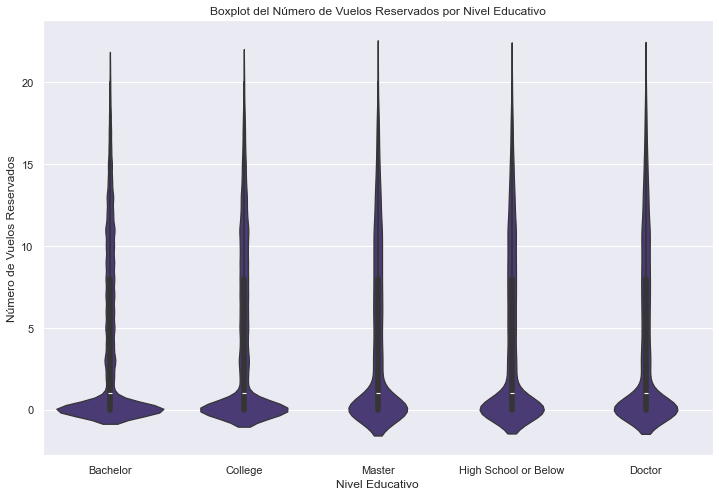

In [261]:
# Crear un boxplot para cada grupo educativo
plt.figure(figsize=(12, 8))
sns.violinplot(x='education', y='flights_booked', data=df_filtrado)

# Añadir etiquetas y título
plt.xlabel('Nivel Educativo')
plt.ylabel('Número de Vuelos Reservados')
plt.title('Boxplot del Número de Vuelos Reservados por Nivel Educativo')
;

No se aprecian a simple vista discrepancias significativas entre grupos

______
Test de normalidad

Para grupos grandes: test de Kolmogorov-Smirnov 

_____

In [262]:
cat_estudios = df_filtrado.groupby('education').sum().reset_index()
cat_estudios

,education,flights_booked
0,Bachelor,1038123
1,College,426398
2,Doctor,74036
3,High School or Below,78993
4,Master,51614


In [263]:
categorias_educacion = cat_estudios['education'].unique().tolist()
categorias_educacion

['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master']

In [264]:
combinaciones_educacion = list(combinations(categorias_educacion, 2))
combinaciones_educacion 

[('Bachelor', 'College'),
 ('Bachelor', 'Doctor'),
 ('Bachelor', 'High School or Below'),
 ('Bachelor', 'Master'),
 ('College', 'Doctor'),
 ('College', 'High School or Below'),
 ('College', 'Master'),
 ('Doctor', 'High School or Below'),
 ('Doctor', 'Master'),
 ('High School or Below', 'Master')]

In [265]:
# Realizar la prueba t de Student para cada combinación
for combinacion in combinaciones_educacion:
    grupo_1 = df_muestra[df_muestra['education'] == combinacion[0]]['flights_booked']
    grupo_2 = df_muestra[df_muestra['education'] == combinacion[1]]['flights_booked']

    # Aplicar la prueba t de Student
    estadistico_t, p_valor_t = ttest_ind(grupo_1, grupo_2)

    alpha = 0.05
    if p_valor_t < alpha:
        print(f" En {combinacion} --->Hay diferencias significativas el número de vuelos promedio entre al menos dos grupos .")
        print("\n ---------- \n")
        print("""
            Los resultados sugieren que existe evidencia estadística para afirmar que las medias de las muestras son distintas.    
            """)
        print("\n ------------------------------------------------------------------- \n")

    else:
        print(f" En {combinacion} ---> No hay evidencia de diferencias significativas en el número de vuelos promedio entre los grupos.")
        print("\n ---------- \n")
        print(""" 
            Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas,
            """)
        print("\n ------------------------------------------------------------------- \n")



    #print(f"Comparación entre {combinacion[0]} y {combinacion[1]}:")
    #print(f"Estadístico t: {estadistico_t}")
   # print(f"P-valor: {p_valor_t}")
    

    
    #print("\n")

 En ('Bachelor', 'College') ---> No hay evidencia de diferencias significativas en el número de vuelos promedio entre los grupos.

 ---------- 

 
            Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas,
            

 ------------------------------------------------------------------- 

 En ('Bachelor', 'Doctor') ---> No hay evidencia de diferencias significativas en el número de vuelos promedio entre los grupos.

 ---------- 

 
            Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas,
            

 ------------------------------------------------------------------- 

 En ('Bachelor', 'High School or Below') ---> No hay evidencia de diferencias significativas en el número de vuelos promedio entre los grupos.

 ---------- 

 
            Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras

Después de este segundo test nos indica que no hay diferencias significativas entre el número de vuelos hechos por categoría educativa.

Exoste una discrepancia en relación al primer test de ANOVA. 